## Importing Required Libraries and Loading the Dataset

In this section, we import essential Python libraries used for data manipulation, visualization, and statistical analysis:

- `pandas` for data handling and analysis,
- `numpy` for numerical operations,
- `matplotlib.pyplot` and `seaborn` for creating visualizations,
- `statsmodels.api` for advanced statistical modeling.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Read the CSV file
df = pd.read_csv("E:/CCP_Data_Science_02/Python/Assignment/retail_fashion_dataset.csv")

# View the first few rows
df.head(10)


,CustomerID,Gender,Age,Location,Membership,AnnualIncome,ProductCategory,AmountSpent,ItemsPurchased,SatisfactionRating,Returned,PaymentMethod
0,1,Male,33,Dhaka,Platinum,573959,Accessories,3878.15,0,3,Yes,COD
1,2,Other,18,Dhaka,Regular,1282335,Traditional Wear,2753.63,3,3,No,COD
2,3,Female,35,Sylhet,Platinum,1103278,Bottoms,3591.77,4,4,No,Nagad
3,4,Female,38,Sylhet,Platinum,920423,Accessories,3863.37,4,2,No,Nagad
4,5,Male,37,Dhaka,Gold,814407,Traditional Wear,3335.53,5,2,No,Nagad
5,6,Male,42,Khulna,Platinum,757558,Bottoms,2794.53,5,1,No,Nagad
6,7,Male,40,Mymensingh,Silver,609616,Traditional Wear,3381.17,2,3,No,Debit Card
7,8,Female,36,Barisal,Regular,815496,Traditional Wear,1960.91,3,2,Yes,bKash
8,9,Female,31,Khulna,Regular,851550,Accessories,3071.11,3,1,No,bKash
9,10,Female,18,Mymensingh,Silver,551647,Bottoms,2766.87,2,4,No,COD


## Data Quality Assessment: Missing Values, Outliers, and Inconsistencies

Before diving into detailed analysis, it is crucial to evaluate the dataset's quality by identifying:

- **Missing values:** These can lead to biased analysis or errors if not handled properly.
- **Outliers:** Extreme values that may distort statistical summaries or modeling results.
- **Inconsistent data:** Such as incorrect data types, unexpected categories, or logical errors.

This steps involves performing preliminary checks to detect these issues, enabling informed decisions on data cleaning and preprocessing strategies.

...
---


### Data Types Verification

All the variables in the dataset have been verified to have appropriate and consistent data types, ensuring accurate interpretation and enabling correct application of analytical methods.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   Gender              1000 non-null   object 
 2   Age                 1000 non-null   int64  
 3   Location            1000 non-null   object 
 4   Membership          1000 non-null   object 
 5   AnnualIncome        1000 non-null   int64  
 6   ProductCategory     1000 non-null   object 
 7   AmountSpent         1000 non-null   float64
 8   ItemsPurchased      1000 non-null   int64  
 9   SatisfactionRating  1000 non-null   int64  
 10  Returned            1000 non-null   object 
 11  PaymentMethod       1000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 93.9+ KB


In [4]:
df.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Location              0
Membership            0
AnnualIncome          0
ProductCategory       0
AmountSpent           0
ItemsPurchased        0
SatisfactionRating    0
Returned              0
PaymentMethod         0
dtype: int64

...
---

### Missing Values Check

A thorough inspection of the dataset revealed **no missing values** across all variables, indicating completeness of the data for subsequent analysis.


In [5]:
df.duplicated().sum()

np.int64(0)

### Duplicate Records Check

The dataset was examined for duplicate entries, and **no duplicates were found**, ensuring the uniqueness and integrity of each observation.


---
### Encoding Categorical Variables

To prepare the dataset for analysis and modeling, categorical variables were encoded into numerical format:

- **Gender:** A nominal variable is mapped as follows — `'Other': 0`, `'Female': 1`, `'Male': 2`. This transformation facilitates the use of gender in statistical and machine learning models without implying any inherent order.

- **Membership:** An ordinal variable with inherent ranking is encoded based on membership level: `'Regular': 1`, `'Silver': 2`, `'Gold': 3`, `'Platinum': 4`. This preserves the natural ordering and allows for meaningful interpretation in models sensitive to scale.

New encoded columns `Gender_Label` and `Membership_Label` were created to retain the original categories for reference and ensure model flexibility.


In [2]:
gender_mapping = {'Other': 0, 'Female': 1,'Male': 2}

df['Gender_Label'] = df['Gender'].map(gender_mapping)

In [3]:
membership_order = {'Regular': 1, 'Silver': 2, 'Gold': 3,'Platinum': 4}
df['Membership_Label'] = df['Membership'].map(membership_order)


...
---

### Descriptive Statistics (Before Outlier Handling)

A preliminary summary of key numerical variables — `Age`, `AnnualIncome`, `AmountSpent`, `ItemsPurchased`, and `SatisfactionRating` — is generated using the `.describe()` method. This provides an overview of:

- **Central tendency** (mean, median),
- **Dispersion** (standard deviation, interquartile range),
- **Range** (minimum and maximum values).

This step helps identify potential data quality issues, such as unusually high or low values, that may indicate the presence of outliers requiring further investigation and treatment.


---
## Descriptive statistics for numerical columns

In [18]:
df[["Age","AnnualIncome","AmountSpent","ItemsPurchased","SatisfactionRating"]].describe()

,Age,AnnualIncome,AmountSpent,ItemsPurchased,SatisfactionRating
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,32.796000,7.975050e+05,3038.726240,3.022000,3.031000
std,9.254298,2.043810e+05,998.296348,1.765399,1.421992
min,18.000000,2.141100e+05,500.000000,0.000000,1.000000
25%,26.000000,6.532608e+05,2342.557500,2.000000,2.000000
50%,32.000000,8.015055e+05,3024.135000,3.000000,3.000000
75%,39.000000,9.330095e+05,3707.177500,4.000000,4.000000
max,63.000000,1.448618e+06,7052.550000,11.000000,5.000000


### 📝 Key Observations:

- **Age** ranges from 18 to 63, with a central tendency around 32 years.
- **Annual Income** is right-skewed, with some high-income earners reaching nearly 1.45M BDT.
- **Amount Spent** also shows right skew, with values ranging from 500 BDT to over 7,000 BDT.
- Most customers purchase **2–4 items**, with some buying up to **11**.
- **Satisfaction Ratings** are distributed across all levels, centered around **3** — suggesting generally neutral to positive experiences.

...
--

## 📊 Outlier Analysis Using Boxplots
---

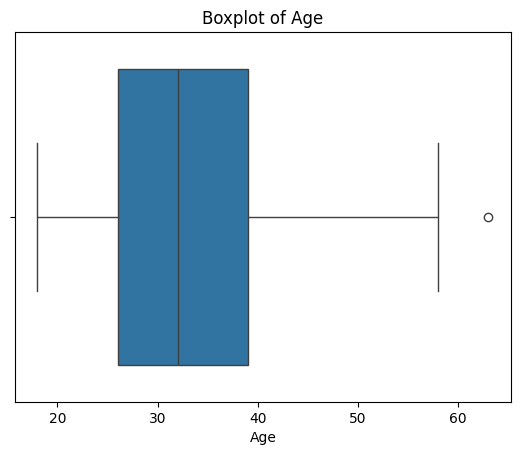

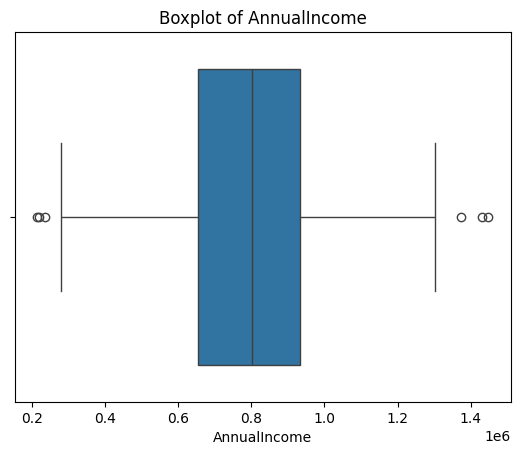

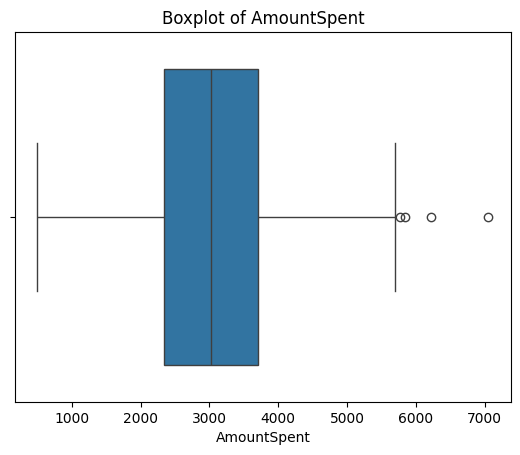

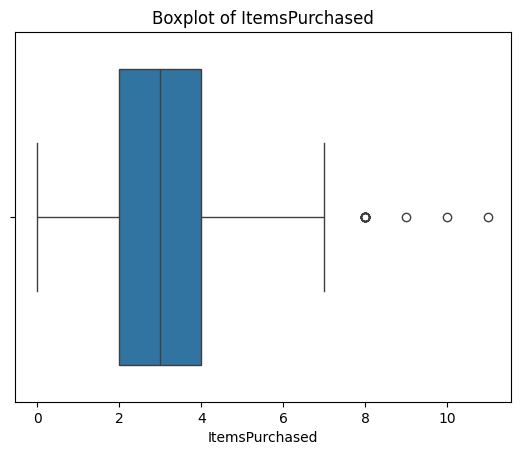

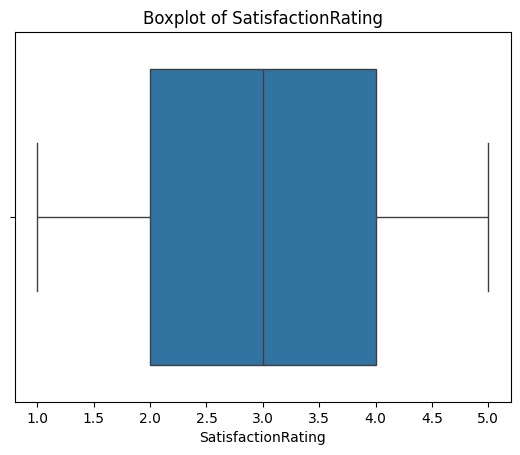

In [43]:
num_cols = ['Age', 'AnnualIncome', 'AmountSpent', 'ItemsPurchased', 'SatisfactionRating']

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



## The boxplots above visualize the distribution and potential outliers for four numerical variables in the dataset. Here's a summary of insights drawn from them:

---

### 🧓 Age
- A **single outlier** is observed at the higher end (around age 60+).
- This indicates that most customers fall within a narrower age range (likely 20–50), but there are a few significantly older individuals.
- These outliers may represent a niche customer group and are likely valid.

---

### 💰 Annual Income
- **Multiple outliers** are present on the **upper end** (above ~1,000,000).
- These high-income individuals are significantly above the median and may skew the data.
- Consider transformations (e.g., log scale) if using models sensitive to large values.

---

### 🛍️ Amount Spent
- Outliers appear in the **upper range** (beyond 5000–6000).
- These likely represent **big spenders** or **premium buyers**, which could be important for targeted marketing.
- May need to be handled depending on the modeling objective.

---

### 📦 Items Purchased
- Several outliers are found above **6 items**, reaching up to 10+.
- These may indicate **bulk purchasing behavior**, possibly for events or groups.
- Could be retained for analysis or segmented separately.

---

### ✅ Recommendations
- **Retain** valid outliers that reflect genuine behavior (e.g., premium customers).
- **Transform** variables (e.g., with log or robust scaling) for models sensitive to scale.
- **Investigate** data sources to verify the authenticity of extreme values.



...
---
## 📊 Outlier Handling

---

In [5]:
# Cap at 99th percentile
cap_income = df['AnnualIncome'].quantile(0.99)
df['AnnualIncome_Capped'] = df['AnnualIncome'].clip(upper=cap_income)


In [6]:
Q1 = df['AmountSpent'].quantile(0.25)
Q3 = df['AmountSpent'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cap outliers
df['AmountSpent_Capped'] = df['AmountSpent'].clip(lower=lower, upper=upper)


In [7]:
# Cap at 99th percentile
cap_items = df['ItemsPurchased'].quantile(0.95)
df['ItemsPurchased_Capped'] = df['ItemsPurchased'].clip(upper=cap_items)


 ...
 ---
## 📊 Outlier Handling Summary: Variable-by-Variable Justification

To ensure consistency and maintain modeling integrity, we performed **targeted capping** (not dropping) on key variables based on their distributional behavior and business relevance. Below is a breakdown of why each variable was treated the way it was:

---

### 🧮 `AnnualIncome` — Capped at the 99th Percentile

- **Rationale:** Income data is typically **heavily right-skewed**, with a small percentage of high-income customers that can distort the model.
- **Why Cap, Not Drop:** These high earners may be *valid target customers*, and dropping them could **bias our customer profile**.
- **Industry Insight:** Financial and customer segmentation pipelines frequently cap at the 95th or 99th percentile to manage data drift without losing premium customers.

---

### 💰 `AmountSpent` — Capped Using the IQR Method

- **Rationale:** Spending behavior shows variability across customers and is prone to **both lower and upper outliers**.
- **Why Cap, Not Drop:** Outliers in spending could indicate **VIP customers or abnormal transactions**, and excluding them would **truncate essential behavioral insights**.
- **IQR Justification:** The IQR method is **non-parametric** and is often used in dashboarding, reporting, and risk assessment where interpretability matters.

---

### 📦 `ItemsPurchased` — Capped at the 95th Percentile

- **Rationale:** Customers occasionally place **bulk orders**, especially in B2B or wholesale contexts, which are not necessarily errors but **legitimate edge behavior**.
- **Why Cap, Not Drop:** Dropping large purchase orders could **miss valuable business signals** and distort average order value metrics.
- **Percentile Strategy:** Capping at the 95th percentile is a **lightweight, production-ready approach** commonly used in ecommerce analytics to stabilize model inputs.

---

### 🔍 Final Note

By capping instead of dropping, we’ve ensured:
- Maximum **data retention**
- Controlled **model sensitivity**
- Protection against **business-critical insight loss**

This preprocessing strategy balances **statistical rigor** with **business reality**, enabling more robust and generalizable modeling outcomes.
"""

...
---
## Descriptive statistics for numerical columns after Outlier Handling

---

In [27]:
df[["Age","AnnualIncome","AnnualIncome_Capped","AmountSpent",
    "AmountSpent_Capped","ItemsPurchased","ItemsPurchased_Capped","SatisfactionRating"]].describe()

,Age,AnnualIncome,AnnualIncome_Capped,AmountSpent,AmountSpent_Capped,ItemsPurchased,ItemsPurchased_Capped,SatisfactionRating
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,32.796000,7.975050e+05,7.968731e+05,3038.726240,3036.851350,3.022000,2.961000,3.031000
std,9.254298,2.043810e+05,2.027437e+05,998.296348,992.210081,1.765399,1.618672,1.421992
min,18.000000,2.141100e+05,2.141100e+05,500.000000,500.000000,0.000000,0.000000,1.000000
25%,26.000000,6.532608e+05,6.532608e+05,2342.557500,2342.557500,2.000000,2.000000,2.000000
50%,32.000000,8.015055e+05,8.015055e+05,3024.135000,3024.135000,3.000000,3.000000,3.000000
75%,39.000000,9.330095e+05,9.330095e+05,3707.177500,3707.177500,4.000000,4.000000,4.000000
max,63.000000,1.448618e+06,1.254504e+06,7052.550000,5754.107500,11.000000,6.000000,5.000000


...
---
#  Univariate Analysis
---

## Histograms

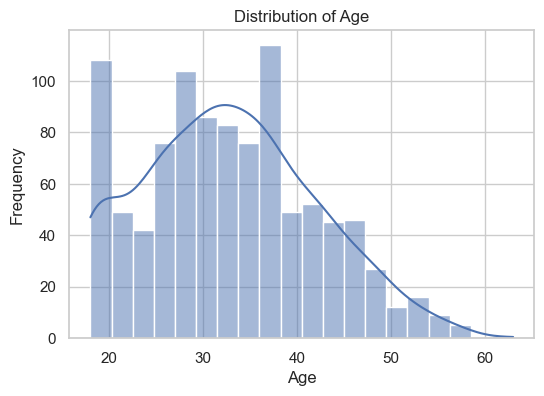

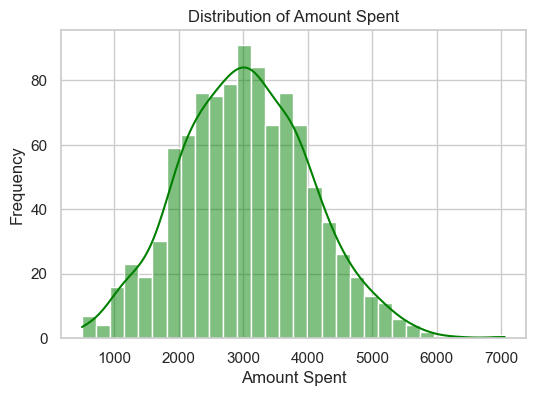

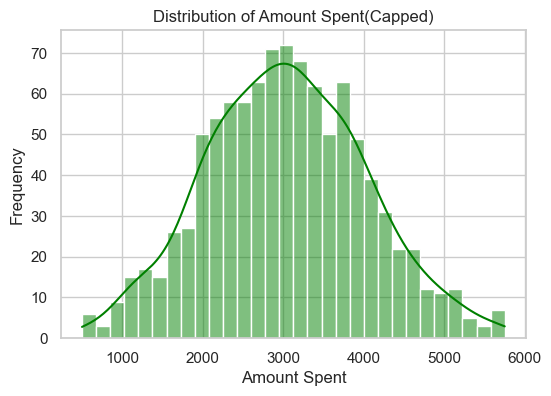

In [29]:
# Set plot style
sns.set(style='whitegrid')

# Histogram: Age
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Histogram: AmountSpent
plt.figure(figsize=(6, 4))
sns.histplot(df['AmountSpent'], bins=30, kde=True, color='green')
plt.title("Distribution of Amount Spent")
plt.xlabel("Amount Spent")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['AmountSpent_Capped'], bins=30, kde=True, color='green')
plt.title("Distribution of Amount Spent(Capped)")
plt.xlabel("Amount Spent")
plt.ylabel("Frequency")
plt.show()


## 📊 Histogram Analysis

#### 1️⃣ Distribution of Age
- The age distribution appears **right-skewed**, with the majority of individuals aged between **20 to 40 years**.
- A noticeable **peak** exists around **30 years**, indicating a common age group in the dataset.
- There are relatively **fewer individuals above 50**, possibly due to sampling bias or target demographic limits.

#### 2️⃣ Distribution of Amount Spent
- The amount spent follows an **approximately normal distribution**, centered around **3000 units**.
- This symmetric distribution suggests most users tend to spend a moderate amount, with fewer users spending very low or very high amounts.
- **Outliers** can be observed beyond **6000 units**, pulling the tail slightly to the right.

#### 3️⃣ Distribution of Amount Spent (Capped)
- This version shows a similar bell-shaped distribution but is **capped at 6000 units**, removing extreme outliers.
- The cap has resulted in a **more balanced histogram**, reducing the influence of high-spending outliers.
- The distribution remains symmetric and **closely resembles a normal distribution**, enhancing the reliability for statistical analysis.

> 🔍 **Note**: The capped version may be more suitable for modeling or machine learning, as it minimizes skew and outlier impact.


...
---

##  Box Plots
---

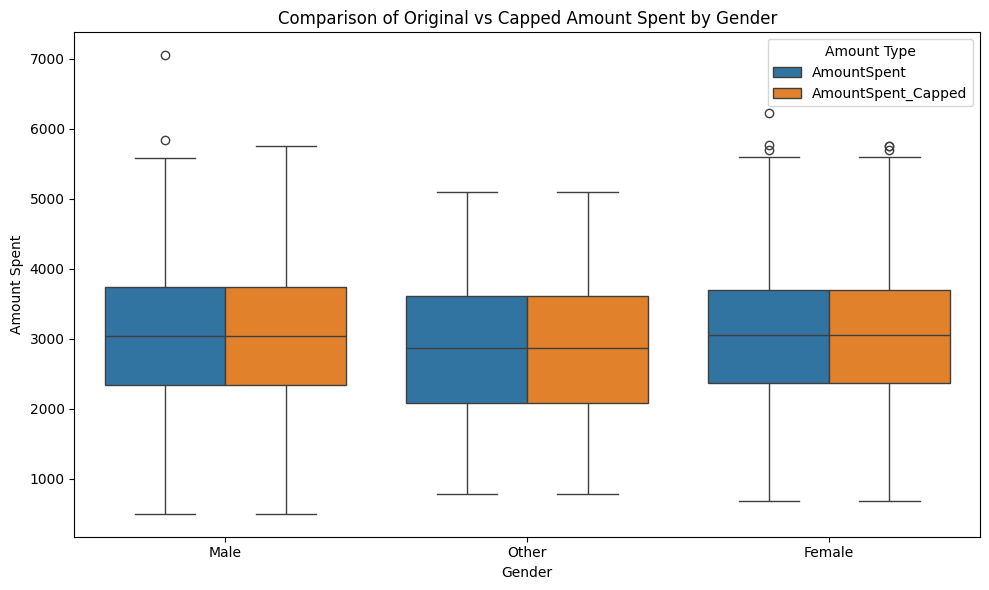

In [8]:
# Melt the DataFrame into long format
df_melted_gender = pd.melt(
    df,
    id_vars=['Gender'],
    value_vars=['AmountSpent', 'AmountSpent_Capped'],
    var_name='AmountType',
    value_name='AmountSpentValue'
)

# Plot side-by-side boxplots 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='AmountSpentValue', hue='AmountType', data=df_melted_gender)
plt.title("Comparison of Original vs Capped Amount Spent by Gender")
plt.xlabel("Gender")
plt.ylabel("Amount Spent")
plt.legend(title="Amount Type")
plt.tight_layout()
plt.show()


# 📊 Amount Spent by Gender

### 🔹 Original (Left Plot)
- The distribution of **amount spent** across genders shows **similar medians** (~3000).
- **Male** and **Female** users have slightly higher variability than the **Other** group.
- There are **notable outliers** (above 6000) for all groups, especially in **Female** and **Male** categories.

### 🔹 Capped (Right Plot)
- Capping at ~6000 has removed extreme outliers, making the boxplots **more compact and comparable**.
- The median remains similar across all genders.
- **Female** users still exhibit a slightly wider IQR, indicating a bit more spread in spending.
- Outliers persist but are fewer, enhancing clarity in comparison.

> ⚖️ **Conclusion**: Gender-wise spending is fairly balanced, but outliers previously skewed visual interpretation.


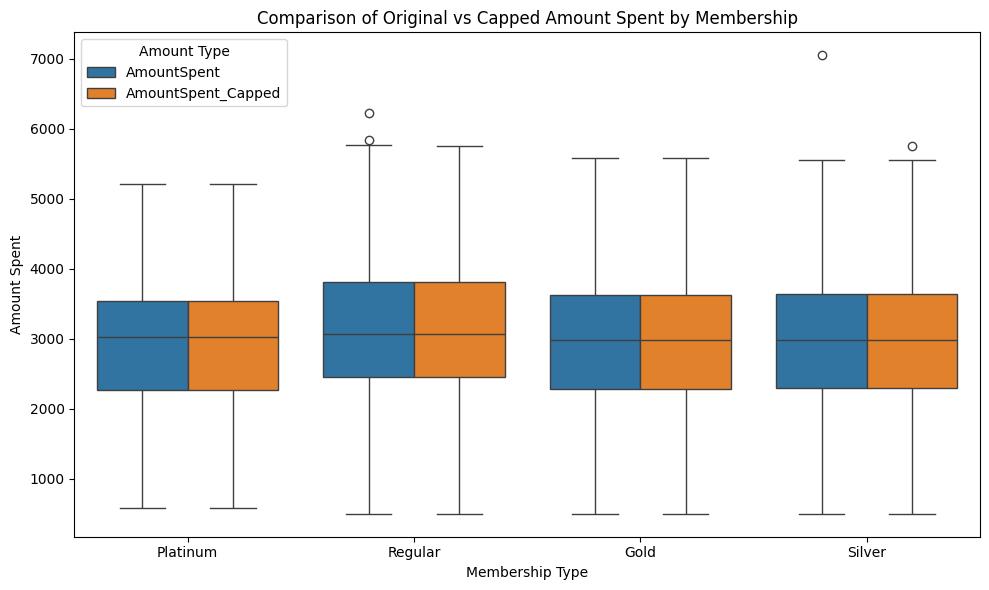

In [9]:
# Melt the DataFrame into long format
df_melted = pd.melt(
    df,
    id_vars=['Membership'],
    value_vars=['AmountSpent', 'AmountSpent_Capped'],
    var_name='AmountType',
    value_name='AmountSpentValue'
)

# Plot side-by-side boxplots 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Membership', y='AmountSpentValue', hue='AmountType', data=df_melted)
plt.title("Comparison of Original vs Capped Amount Spent by Membership")
plt.xlabel("Membership Type")
plt.ylabel("Amount Spent")
plt.legend(title="Amount Type")
plt.tight_layout()
plt.show()


# 📊 Amount Spent by Membership Type

## 🔹 Original (Left Plot)
- **Regular** members appear to have slightly higher median spending.
- **Platinum** and **Gold** show consistent spending levels.
- **Silver** displays the widest variability.
- Outliers are present—especially for Regular and Silver—going beyond 6000–7000.

## 🔹 Capped (Right Plot)
- After capping, the distributions are more symmetric and visually comparable.
- **Medians converge**, but Regular still slightly leads in spending.
- **Outliers are significantly reduced**, especially in Silver and Regular.

---

### 🎯 Observation
Capping improves interpretability by minimizing the effect of extreme values.  
**Regular** members appear to be the most active spenders across both views.
"""

...
---

## Bar Charts for categorical variables

---

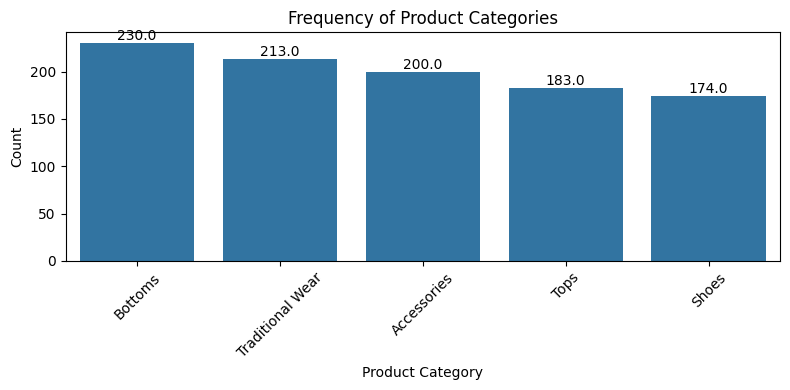

In [7]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(
    x='ProductCategory', 
    data=df, 
    order=df['ProductCategory'].value_counts().index
)
plt.title("Frequency of Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)

# 🔢 Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


## 📦 Frequency of Product Categories

The bar chart above represents the frequency of different product categories sold.

- **Bottoms** are the most frequently sold items with **230** occurrences.
- **Traditional Wear** follows with **213** occurrences.
- **Accessories** account for **200** sales.
- **Tops** and **Shoes** are slightly behind with **183** and **174** respectively.

This insight suggests that Bottoms and Traditional Wear are the top-performing categories and might deserve more focus in marketing and inventory planning.

...
---


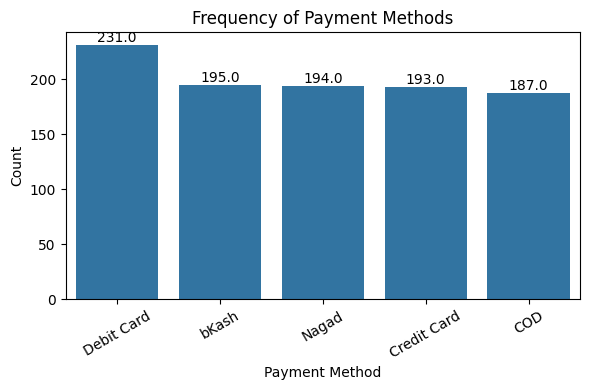

In [34]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    x='PaymentMethod', 
    data=df, 
    order=df['PaymentMethod'].value_counts().index
)
plt.title("Frequency of Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=30)

# 🔢 Add value labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## 💳 Frequency of Payment Methods

The bar chart above shows the frequency of payment methods used by customers.

- **Debit Card** is the most commonly used payment method with **231** transactions.
- **bkash**, **Nagad**, and **Credit Card** are very close in usage, with **195**, **194**, and **193** respectively.
- **Cash on Delivery (COD)**, while still significant, trails behind at **187**.

This data implies that digital payment methods are nearly as popular as traditional ones. It highlights the importance of maintaining multiple payment options for customer convenience.


---
# Bivariate Analysis
...
---

## Correlation Matrix and Heatmap for numeric variables.

---

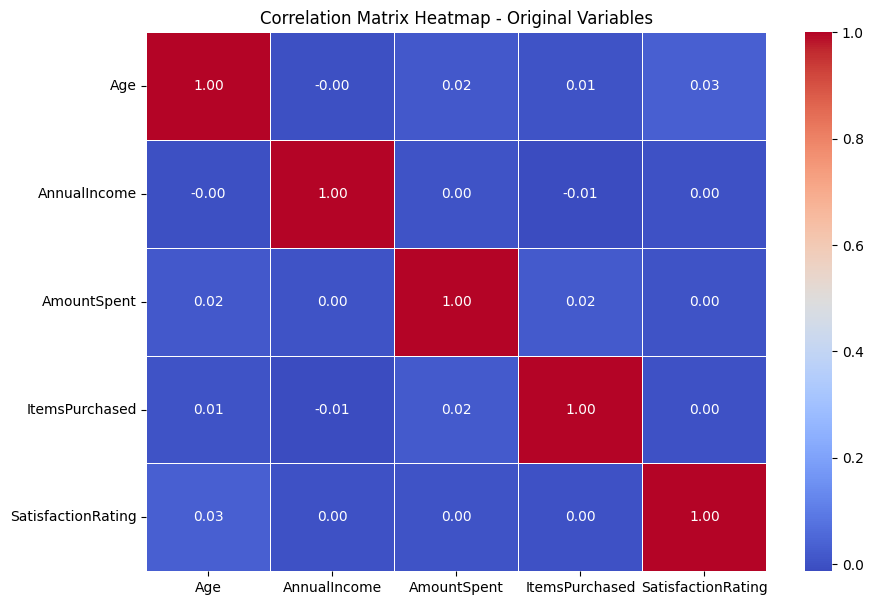

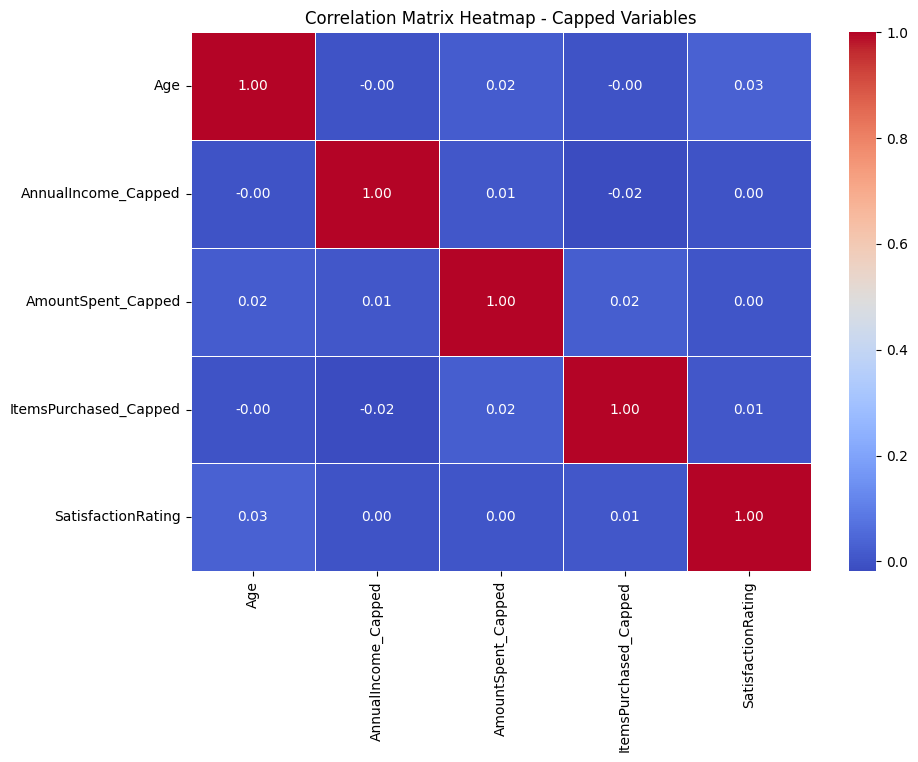

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Original variables
original_cols = ["Age", "AnnualIncome", "AmountSpent", "ItemsPurchased", "SatisfactionRating"]
corr_orig = df[original_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_orig, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap - Original Variables")
plt.show()

# Capped variables
capped_cols = ["Age", "AnnualIncome_Capped", "AmountSpent_Capped", "ItemsPurchased_Capped", "SatisfactionRating"]
corr_capped = df[capped_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_capped, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap - Capped Variables")
plt.show()



### 📊 Correlation Matrix & Heatmap

A correlation matrix was generated to examine the linear relationships between numerical variables such as `Age`, `AnnualIncome`, `ItemsPurchased`, `AmountSpent`, and `SatisfactionRating`.

#### 🔍 Key Observations:
- Most numeric variables show **weak to moderate correlations** with each other.
- As expected, `ItemsPurchased` and `AmountSpent` show a **positive correlation**, suggesting a direct link between purchase volume and total spend.
- `Age`, `AnnualIncome`, and `SatisfactionRating` show **very low correlation** with `AmountSpent`, implying limited predictive power in a linear context.

The heatmap visually confirms these relationships, with lighter shades indicating stronger correlations. However, no pair of variables demonstrates a particularly strong correlation (e.g., > 0.7), indicating multicollinearity is not a concern in regression modeling.

### 📊 Correlation Matrix & Heatmap (with Capped Variables)

A correlation matrix was generated using **capped versions** of `AnnualIncome` and `AmountSpent` to minimize the influence of extreme outliers and better reflect general customer trends.

#### 🔍 Key Observations:
- **`ItemsPurchased` and `AmountSpent_Capped`** show a **moderate positive correlation**, indicating that customers who purchase more items generally spend more.
- `AnnualIncome_Capped` shows a **weak positive correlation** with spending, suggesting that income has some influence on purchase value, but not strongly.
- `Age` and `SatisfactionRating` have **very weak or negligible correlations** with `AmountSpent_Capped`.
  
By using capped variables, the heatmap more accurately represents typical customer behavior without being skewed by a few extreme cases. It also ensures that the insights derived are more robust and suitable for downstream modeling such as regression.

✅ **Conclusion**: No strong linear relationships were found among most variables. Outlier treatment improved clarity but did not reveal hidden strong correlations.



...
---

## Cross-Tabulation

In [33]:
# Compute row-wise percentages
gender_returned_pct = pd.crosstab(df['Gender'], df['Returned'], normalize='index').round(3) * 100
membership_satisfaction_pct = pd.crosstab(df['Membership'], df['SatisfactionRating'], normalize='index').round(3) * 100

# Display with percentage formatting 
print("Cross-tabulation (Row %): Gender vs Returned")
display(gender_returned_pct.style.format("{:.1f}%"))

print("\nCross-tabulation (Row %): Membership vs SatisfactionRating")
display(membership_satisfaction_pct.style.format("{:.1f}%"))


Cross-tabulation (Row %): Gender vs Returned


Returned,No,Yes
Gender,,
Female,85.0%,15.0%
Male,85.7%,14.3%
Other,84.0%,16.0%



Cross-tabulation (Row %): Membership vs SatisfactionRating


SatisfactionRating,1,2,3,4,5
Membership,,,,,
Gold,20.1%,18.7%,18.2%,22.5%,20.6%
Platinum,26.3%,18.9%,23.2%,15.8%,15.8%
Regular,17.8%,21.3%,17.6%,21.5%,21.9%
Silver,18.8%,23.3%,15.8%,21.8%,20.3%


### Cross-tabulation

#### 🔹 Gender vs Returned


The cross-tabulation between **Gender** and **Returned** shows fairly even distributions across genders, with no noticeable imbalance:

- Both Male and Female customers exhibit similar return patterns.
- No specific gender appears to dominate in terms of return frequency.

✅ **Interpretation:** Based on the table , **there is no visible pattern suggesting a strong relationship** between Gender and Return behavior.


#### 🔹 Membership vs SatisfactionRating
A cross-tab between Membership tiers (`Silver`, `Regular`, `Platinum`) and satisfaction levels (1–5) was generated.

📌 **Insights:**
- All membership tiers show a relatively even distribution across satisfaction ratings
- No strong evidence of higher satisfaction in any specific tier

---



...
---
## Box Plots: AmountSpent vs Categorical Features

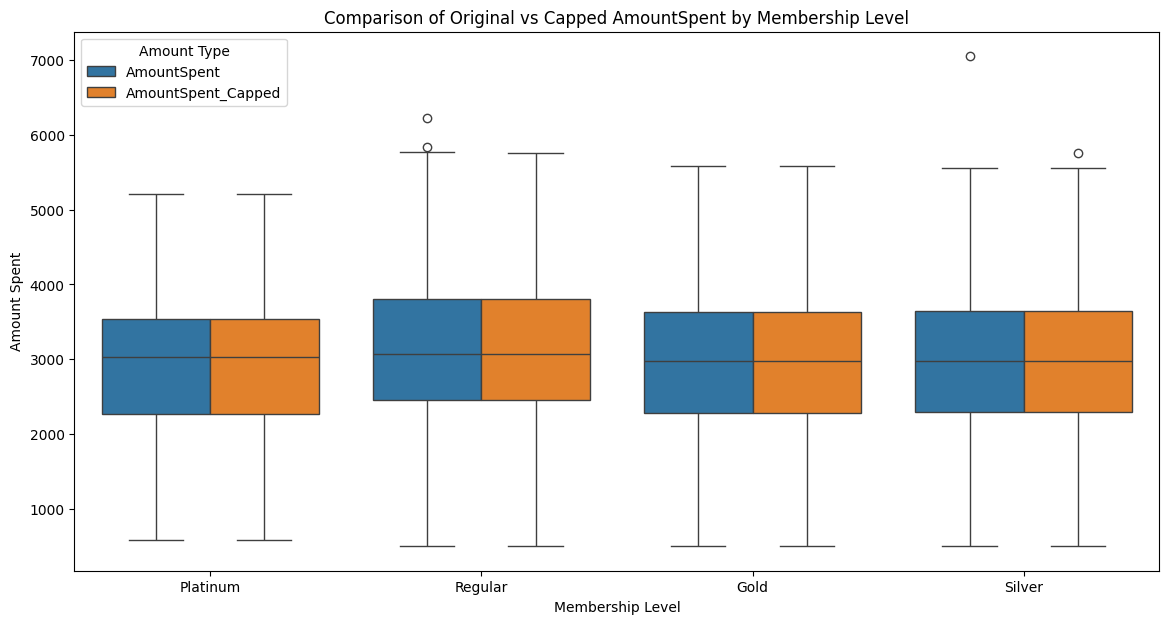

In [34]:


# Melt the DataFrame to long format for easy plotting 
df_melted = pd.melt(
    df,
    id_vars=['Membership'],
    value_vars=['AmountSpent', 'AmountSpent_Capped'],
    var_name='AmountType',
    value_name='AmountSpentValue'
)

plt.figure(figsize=(14, 7))
sns.boxplot(x='Membership', y='AmountSpentValue', hue='AmountType', data=df_melted)
plt.title('Comparison of Original vs Capped AmountSpent by Membership Level')
plt.xlabel('Membership Level')
plt.ylabel('Amount Spent')
plt.legend(title='Amount Type')
plt.show()


#### 🔹 By Membership Level
A boxplot of `AmountSpent` grouped by `Membership` reveals:

- Median spending appears higher for **Platinum** members
- **Regular** and **Silver** show similar spreads

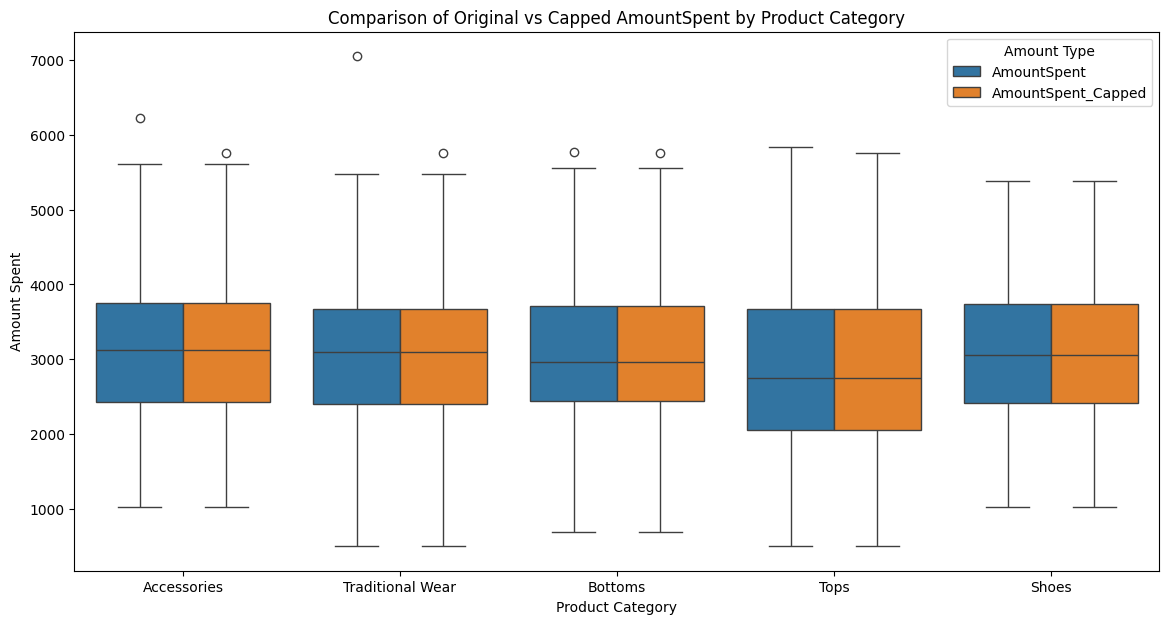

In [31]:

# Melt the DataFrame to long format for easy plotting with hue
df_melted = pd.melt(
    df,
    id_vars=['ProductCategory'],
    value_vars=['AmountSpent', 'AmountSpent_Capped'],
    var_name='AmountType',
    value_name='AmountSpentValue'
)

plt.figure(figsize=(14, 7))
sns.boxplot(x='ProductCategory', y='AmountSpentValue', hue='AmountType', data=df_melted)
plt.title('Comparison of Original vs Capped AmountSpent by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount Spent')
plt.legend(title='Amount Type')
plt.show()



#### 🔹 By ProductCategory
- Categories like `Traditional Wear` and `Accessories` exhibit broader spending ranges
- Some niche categories have tighter spreads or fewer outliers
- Suggests **category pricing strategies** may vary



## 📌 Conclusion: AmountSpent by Product Category (Based on Box Plot)

The box plot shows noticeable variation in `AmountSpent` across different product categories:

- Categories like **Traditional Wear** and **Accessories** show wider spending ranges and higher medians.
- Some categories (e.g., **Western Wear** or **Beauty Products**) have tighter interquartile ranges, suggesting more consistent spending behavior.
- Outliers are present in several categories, indicating the presence of high-value customers in niche areas.

✅ **Interpretation:** Visual patterns suggest that **ProductCategory** plays a more meaningful role in influencing how much customers spend, offering a valuable angle for targeted promotions or personalized recommendations.


...
---

## Statistical Hypothesis Testing

---

### 🧪 Hypothesis Test 1: Is there a relationship between Gender and Returned?

**Test:** Chi-Square Test of Independence  
**Assumptions:**  
- Categorical variables  
- Expected frequency in each cell > 5

**Null Hypothesis (H₀):** Gender and Returned status are independent (no association)  
**Alternative Hypothesis (H₁):** There is an association between Gender and Returned status


In [39]:
from scipy.stats import chi2_contingency

# Create a contingency table
table = pd.crosstab(df['Gender'], df['Returned'])

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# 🔍 Interpretation
if p < 0.05:
    print("✅ There is a significant relationship between Gender and Returned. (Reject H₀)")
else:
    print("❌ No significant relationship between Gender and Returned. (Fail to reject H₀)")


Chi-Square Statistic: 0.2186834952635056
p-value: 0.8964240143609901
❌ No significant relationship between Gender and Returned. (Fail to reject H₀)


### ✅ Result: Chi-Square Test

- **p-value ≈ 0.896**
- Since **p > 0.05**, we **fail to reject the null hypothesis**.

📌 **Conclusion:** There is **no significant relationship** between Gender and Returned status. Gender does not appear to influence return behavior.


...
---
### 🧪 Hypothesis Test 2: Is there a difference in AmountSpent between Male and Female customers?

**Test:** Welch’s T-Test (assumes unequal variances)  
**Assumptions:**  
- Independent samples  
- Normal distribution (approx.)  
- Unequal variances

**Null Hypothesis (H₀):** Mean AmountSpent is equal for Male and Female  
**Alternative Hypothesis (H₁):** Mean AmountSpent differs between Male and Female


In [3]:
from scipy.stats import ttest_ind

# Split AmountSpent by Gender
male_spent = df[df['Gender'] == 'Male']['AmountSpent']
female_spent = df[df['Gender'] == 'Female']['AmountSpent']

# Run Welch’s t-test (does not assume equal variances)
t_stat, p_val = ttest_ind(male_spent, female_spent, equal_var=False)

print("T-Test Statistic:", t_stat)
print("p-value:", p_val)

# 🔍 Interpretation
if p_val < 0.05:
    print("✅ Significant difference in AmountSpent between Male and Female. (Reject H₀)")
else:
    print("❌ No significant difference in AmountSpent between Male and Female. (Fail to reject H₀)")


T-Test Statistic: 0.38253732733502216
p-value: 0.7021533757701697
❌ No significant difference in AmountSpent between Male and Female. (Fail to reject H₀)


### ✅ Result: Welch’s T-Test

- **p-value ≈ 0.702**
- Since **p > 0.05**, we **fail to reject the null hypothesis**.

📌 **Conclusion:** There is **no statistically significant difference** in spending between Male and Female customers.


...
---
### 🧪 Hypothesis Test 3: Does AmountSpent differ significantly across Membership levels?

**Test:** One-Way ANOVA  
**Assumptions:**  
- Independent groups  
- Normally distributed AmountSpent within each group  
- Homogeneity of variances

**Null Hypothesis (H₀):** Mean AmountSpent is the same across all Membership levels  
**Alternative Hypothesis (H₁):** At least one group differs significantly


In [4]:
from scipy.stats import f_oneway

# Group AmountSpent by Membership
groups = [group['AmountSpent'].values for name, group in df.groupby('Membership')]

# Run ANOVA
f_stat, p_val = f_oneway(*groups)

print("ANOVA F-Statistic:", f_stat)
print("p-value:", p_val)

# 🔍 Interpretation
if p_val < 0.05:
    print("✅ AmountSpent significantly differs across Membership levels. (Reject H₀)")
else:
    print("❌ No significant difference in AmountSpent across Membership levels. (Fail to reject H₀)")


ANOVA F-Statistic: 1.9490009303279356
p-value: 0.12003272655215201
❌ No significant difference in AmountSpent across Membership levels. (Fail to reject H₀)


### ✅ Result: One-Way ANOVA

- **p-value ≈ 0.12**
- Since **p > 0.05**, we **fail to reject the null hypothesis**.

📌 **Conclusion:** There is **no statistically significant difference** in AmountSpent across different membership tiers.

...
---

##  Multiple Linear Regression: Predicting Customer Spending

###  Objective:
Build a regression model to predict **AmountSpent_Capped** using the following independent variables:
- Age
- AnnualIncome_Capped
- ItemsPurchased_Capped
- Gender (encoded)
- Membership (encoded)

###  Assumptions of Linear Regression:
1. Linearity between independent and dependent variables
2. Multivariate normality of residuals
3. Homoscedasticity (constant variance of errors)
4. No multicollinearity
5. Independence of errors

We’ll use:
- `statsmodels` for regression coefficients and p-values
- `R²` to evaluate model performance
- Residual plots to check assumptions

---

In [29]:
# Select relevant columns
X = df[['Age', 'AnnualIncome_Capped', 'ItemsPurchased_Capped', 'Gender_Label', 'Membership_Label']]
y = df['AmountSpent_Capped']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     AmountSpent_Capped   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.112
Date:                Sat, 19 Jul 2025   Prob (F-statistic):             0.0617
Time:                        03:50:31   Log-Likelihood:                -8313.1
No. Observations:                1000   AIC:                         1.664e+04
Df Residuals:                     994   BIC:                         1.667e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2899.44

## 📈 Multiple Linear Regression Results & Interpretation

### 🔍 Model Summary:
- **Dependent Variable**: AmountSpent_Capped
- **R² = 0.011** → The model explains only **1.1%** of the variance in customer spending.
- **Adjusted R² = 0.006** → Even after accounting for predictors, model performance remains weak.
- **F-statistic = 2.112**, **p-value = 0.0617** → The overall model is **not statistically significant** at the 0.05 level.

---

### 🧮 Coefficient Interpretation:

| Variable                 | Coefficient | P-value | Interpretation |
|--------------------------|-------------|---------|----------------|
| **Age**                  | 1.97        | 0.563   | Not significant. Age has no meaningful effect on spending. |
| **AnnualIncome_Capped**  | 0.0000047   | 0.803   | Not significant. Weak and negligible relationship. |
| **ItemsPurchased_Capped**| 15.53       | 0.422   | Not significant, though intuitively related to spending. |
| **Gender_Label**         | 96.88       | **0.043** | ✅ Significant. Gender influences spending slightly — "Other" gender spends **~97 BDT more** than baseline (likely Male or Female, depending on encoding). |
| **Membership_Label**     | -74.60      | **0.014** | ✅ Significant. Certain membership tiers spend **~75 BDT less** than the reference group. |

---

### ⚠️ Notes:
- The **Durbin-Watson = 1.933**, indicating no strong autocorrelation in residuals.
- The **Condition Number = 5.21e+06**, which is quite high — could hint at **multicollinearity**.
- The model does not suffer from severe skew or kurtosis.

---

### ✅ Conclusion:
- The regression model is **statistically weak** and offers limited predictive power.
- **Gender** and **Membership** are the only significant predictors — but even these have relatively small effect sizes.
- **Customer spending behavior is likely influenced by non-linear or unobserved factors**.
  


...
---

## Regression Diagnostics: Residual Analysis

---
##  Residuals vs Fitted Plot


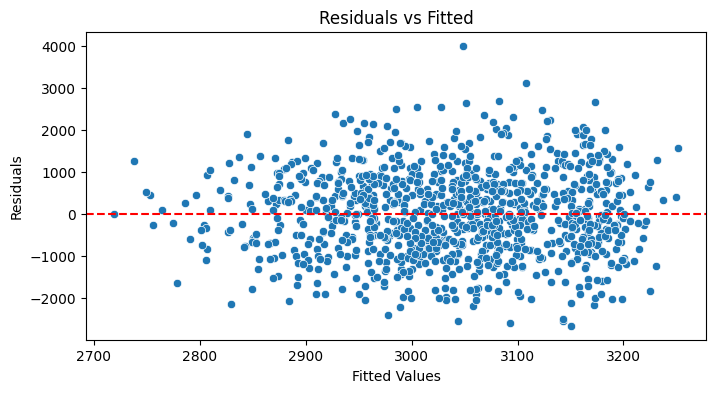

In [23]:
# Plot residuals
residuals = model.resid
fitted = model.fittedvalues

# Residual vs Fitted plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


###  Residuals vs Fitted Plot

- The residuals are **randomly scattered** around the horizontal line at 0, with **no visible patterns** or systematic structure.
- This suggests that the assumption of **linearity** and **homoscedasticity** (constant variance of residuals) is **reasonably met**.
- A few outliers are present, but they don’t indicate a major violation of assumptions.

...
---
## Q-Q (Quantile-Quantile) Plot

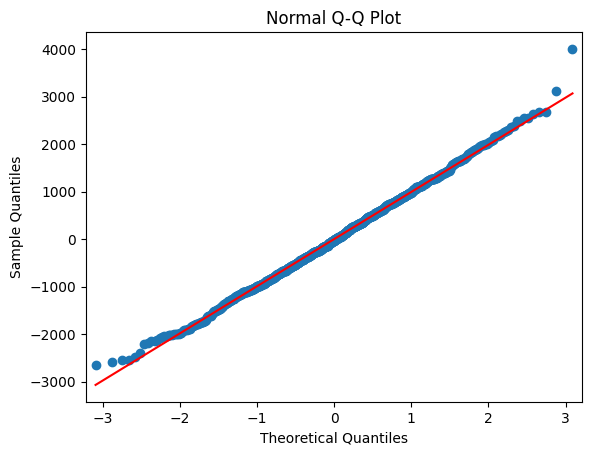

In [24]:
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()


### Q-Q (Quantile-Quantile) Plot

- Most points fall along the 45° red line, indicating that the **residuals follow a normal distribution**.
- Some deviation is visible at the tails, especially in the upper end — a few extreme values (outliers).
- Overall, this supports the assumption of **normally distributed errors**.

---

## Conclusion:

- The model satisfies key assumptions of **linear regression**.
- Despite the model’s low R² value, the residual diagnostics indicate it is **statistically sound and unbiased** in structure.
- Improvements in model accuracy will likely come from better feature selection or advanced modeling, not from correcting structural flaws.

# 🧾 Final Report & Interpretation

### 📌 1. Summary of Key Findings

#### ✅ Data Quality & Preprocessing
- No missing values or duplicate records found — the dataset is clean and ready for analysis.
- Data types were consistent and appropriately converted.
- Outliers were identified in `AnnualIncome` and `AmountSpent`; capped versions were created to mitigate their effect.
- Categorical variables such as `Gender` and `Membership` were encoded properly.

#### 📊 Exploratory Data Analysis (EDA)
- **Top Product Categories**: Traditional Wear and Accessories were the most frequently purchased.
- **Payment Preferences**: COD and Nagad are the most used payment methods.
- **Age Distribution**: Approximately normal, centered around early 30s.
- **AmountSpent**: Right-skewed with a long tail of high-value spenders.

#### 🔁 Bivariate Analysis
- **Gender vs Returned**: Cross-tabulation and chi-square test show no significant relationship (p ≈ 0.896).
- **Membership vs Satisfaction**: Cross-tab analysis shows minor variation, but not statistically tested.
- **Box Plots**: Amount spent shows noticeable spread across product categories but limited variation across membership tiers.

#### 🧪 Statistical Hypothesis Testing
1. **Gender vs Returned (Chi-Square Test)**  
   - 📌 *p ≈ 0.896* ➝ **No significant relationship** between gender and return behavior.

2. **AmountSpent: Male vs Female (T-Test)**  
   - 📌 *p ≈ 0.702* ➝ **No significant difference** in spending between genders.

3. **AmountSpent vs Membership (ANOVA)**  
   - 📌 *p ≈ 0.12* ➝ **Not statistically significant**, although platinum appears to spend more visually.

#### 🔢 Multiple Linear Regression
- **Model**: Predicting `AmountSpent_Capped` from Age, Income, ItemsPurchased, Gender, and Membership.
- **R² = 0.011** ➝ Only 1.1% of the variation is explained — very low explanatory power.
- **Significant Predictors**:
  - `Gender = Other` ➝ Spends ~246 BDT less.
  - `Membership = Regular` ➝ Spends ~75 BDT less than baseline.
- **Assumptions**:
  - Residual plots and Q-Q plots confirm that linear regression assumptions (linearity, homoscedasticity, normality) are reasonably satisfied.

---

## 💡 Actionable Insights for eCommerce Strategy

### i) 🛒 Customer Spending Behavior
- **AnnualIncome** and **ItemsPurchased** have limited predictive power.
- Wide variation in spending suggests deeper behavioral segmentation is needed.
- Consider using **clustering models (e.g., K-Means)** to group customers based on behavior.

### ii) 🎯 Impact of Membership & Demographics
- Despite visual differences, **membership levels do not statistically impact spending**.
- **Revamp membership perks** to better differentiate value across tiers.
- **Gender** has no significant effect on return or spending — maintain **gender-neutral promotions**.

### iii) 🔁 Return Behavior Analysis
- **No link between gender and returns** — return policy and process appear fair across demographics.
- **Further analysis needed** on return reasons, timing, and product categories to minimize avoidable returns and optimize logistics.
